In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Homework 4
Name: Marcelina Nagales <br>
Date: 04/04/18

In [21]:
# code to generate transition matrix
W = np.zeros((5, 5))
W[0] = 0.5
W[4, 4] = 0.5
for i in range(4):
    W[i+1, i] = 0.5 

In [22]:
# transition matrix
W

array([[0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0.5]])

In [23]:
# code to generate eigenvalues and eigenvectors from transition matrix
eigenValues, eigenVectors = np.linalg.eig(W)

In [24]:
# the real component of the eigenvalues
eigenValues.real

array([ 1.0000000e+00, -4.8513264e-05, -4.8513264e-05,  4.8513264e-05,
        4.8513264e-05])

In [25]:
# the real component of the eigenvectors
eigenVectors.real

array([[ 8.62662186e-01,  1.29136450e-12,  1.29136450e-12,
         1.29205783e-12,  1.29205783e-12],
       [ 4.31331093e-01,  8.86518505e-13,  8.86518505e-13,
        -4.05111415e-13, -4.05111415e-13],
       [ 2.15665546e-01, -6.86114440e-05, -6.86114440e-05,
        -6.86114448e-05, -6.86114448e-05],
       [ 1.07832773e-01,  7.07141081e-01,  7.07141081e-01,
        -7.07072470e-01, -7.07072470e-01],
       [ 1.07832773e-01, -7.07072470e-01, -7.07072470e-01,
         7.07141081e-01,  7.07141081e-01]])

In [26]:
# code to generate the steady state distribution from the first eigenvector
eV1 = eigenVectors.real[:, 0]
eV1 = np.abs(eV1) / np.linalg.norm(eV1, 1)
ssd = eV1.reshape((5, 1))

In [27]:
# the steady state distribution
ssd

array([[0.5   ],
       [0.25  ],
       [0.125 ],
       [0.0625],
       [0.0625]])

In [28]:
# code for generating the expected value
x = np.linspace(1, 5, 5)

expectedValue = 0
for i in range(len(x)):
    expectedValue = expectedValue + x[i]*ssd[i]

In [29]:
# the expected value
expectedValue

array([1.9375])

# Question 2

In [30]:
def MultiDNorm(init, mu, sigma, mu2, sigma2):
    """the target distribution, x = [x1, x2],mu, mu2 = mean
    and sigma and sigma2 is the covariance matrix"""
    k = len(init)
    mu.reshape(k,1)
    mu2.reshape(k, 1)
    init.reshape(k,1)
    
    # exponential part
    v = np.exp(-0.5 * np.dot((init - mu).T,np.dot(np.linalg.inv(sigma), (init -mu))))
    # prefactor
    v = v/np.sqrt((2*np.pi)**k * np.linalg.det(sigma))
    
    # exponential part
    v2 = np.exp(-0.5 * np.dot((init - mu2).T,np.dot(np.linalg.inv(sigma2), (init -mu2))))
    # prefactor
    v2 = v2/np.sqrt((2*np.pi)**k * np.linalg.det(sigma2))
    
    return 0.6*v + 0.4*v2

In [31]:
def proposal_u(oldx, delta):
    newx = oldx + np.random.uniform(-delta, delta,oldx.shape)
    return newx

def proposal_n(oldx, delta):
    newx = oldx + np.random.normal(-delta, delta,oldx.shape)
    return newx

def metropolis_accept(newx, oldFuncVal, m, S, m2, S2, func):
    accept = False
    newFuncVal = func(newx, m, S, m2, S2)
    ratio = newFuncVal/(oldFuncVal + 1.0e-21)
    if ratio > 1.:
        accept = True
    elif np.random.rand() < ratio:
        accept = True
        
    return accept, newFuncVal

In [39]:
def driver(x, delta, prop_flag, nsteps, thin=10):
    # target distribution parameters
    mu1 = np.array([3., 0.]).reshape(2,1)
    Sig1 = np.array([[1.5, 0], [0, 0.5]])
    mu2 = np.array([-1.25, 2.5]).reshape(2,1)
    Sig2 = np.array([[0.5, -0.6], [-0.6, 1.]])
    # initialize
    f = MultiDNorm(x, mu1, Sig1, mu2, Sig2)
    AccRatio = 0.0
    NumSucc  = 0
    recz     = np.zeros((int(nsteps/thin), 2)) # record
    # actual chain
    for iMCS in range(nsteps):
        if prop_flag:
            newx = proposal_u(x, delta)
        else:
            newx = proposal_n(x, delta)
            
        accept, newf = metropolis_accept(newx, f, mu1,Sig1, mu2, Sig2, MultiDNorm)
        
        if accept:
            NumSucc += 1
            x = newx
            f = newf
            
        if (iMCS % thin) == 0:
            recz[int(iMCS/thin)] = x.T
    
    AccRatio = float(NumSucc)/float(nsteps)
    
    x = np.linspace(-4,6,100)
    y = np.linspace(-2,6,100)
    X, Y = np.meshgrid(x,y)
    # FIX THIS LINE
    Z = np.zeros((100, 100))
    for i in range(len(X)):
        for j in range(len(Y)):
            init = np.vstack([X[i, j], Y[i, j]])
            Z[i, j] = MultiDNorm(init, mu1, Sig1, mu2, Sig2)
            
    return recz, AccRatio, X, Y, Z

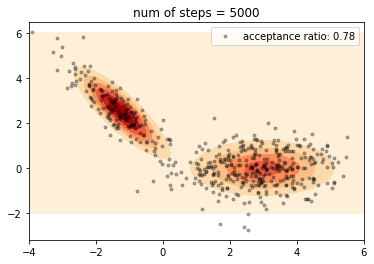

In [126]:
#different trial runs (varying number of MC steps): 
mc_steps = [ 1000, 5000,10000]
# fixed variables:
x2 = np.array([0., 0.]).reshape(2,1)
delta = 0.5
prop_flag = True
# times 4
recz, AccRatio, X, Y, Z =driver(x2, delta, prop_flag, mc_steps[1])

plt.plot(recz[:,0],recz[:,1],'k.', alpha=0.3, label = f'acceptance ratio: {AccRatio:0.02f}')
            
plt.title('num of steps = {:d}'.format(mc_steps[1]))
plt.legend()
plt.contourf(X, Y, Z, cmap=cm.OrRd)

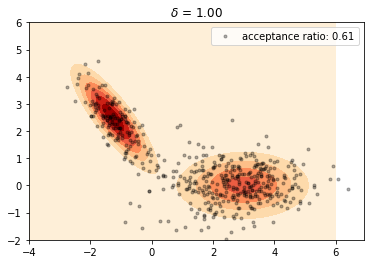

In [140]:
# different trial runs (different delta)
deltas = [0.3, 0.5, 1.0, 2.0]
# fixed variables
nsteps = 5000

# times 4
recz, AccRatio, X, Y, Z = driver(x2, deltas[2], prop_flag, nsteps)
plt.plot(recz[:,0],recz[:,1],'k.', alpha=0.3, label = f'acceptance ratio: {AccRatio:0.02f}')
            
plt.title('$\delta$ = {0:0.2f}'.format(deltas[2]))
plt.legend()
plt.contourf(X, Y, Z, cmap=cm.OrRd)

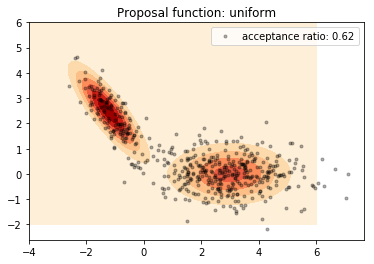

In [128]:
# normal vs proposal function
delta = 1.0

recz, AccRatio, X, Y, Z = driver(x2, delta, True, nsteps)
plt.plot(recz[:,0],recz[:,1],'k.', alpha=0.3, label = f'acceptance ratio: {AccRatio:0.02f}')
            
plt.title('Proposal function: uniform')
plt.legend()
plt.contourf(X, Y, Z, cmap=cm.OrRd)

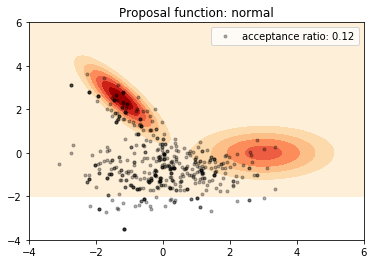

In [129]:
recz, AccRatio, X, Y, Z = driver(x2, delta, False, nsteps)
plt.plot(recz[:,0],recz[:,1],'k.', alpha=0.3, label = f'acceptance ratio: {AccRatio:0.02f}')
            
plt.title('Proposal function: normal')
plt.legend()
plt.contourf(X, Y, Z, cmap=cm.OrRd)

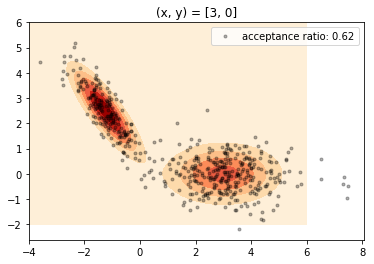

In [144]:
# different initial states
x_vals = [[0,0],[-4,6],[6,-2],[-1,2], [3,0]]

# times 5
recz, AccRatio, X, Y, Z = driver(np.asarray(x_vals[4]).reshape(2,1), delta, prop_flag, nsteps)
plt.plot(recz[:,0],recz[:,1],'k.', alpha=0.3, label = f'acceptance ratio: {AccRatio:0.02f}')
            
plt.title('(x, y) = {0}'.format(x_vals[4]))
plt.legend()
plt.contourf(X, Y, Z, cmap=cm.OrRd)

Tune the parameters, until you are “visually” satisfied with the sampling. Report your observations, and try to explain them in terms of (a) the acceptance ratio, and (b) peaks exploration of both peaks?

Number of MC steps
> When modifying the number of MC steps, I found that although the acceptance ratio was highest with 1000 steps (0.78), the contour plot was too sparse to be an acceptable exploration of peaks. With 5000 steps, the exploration of peaks was even and had about the same value of acceptance ratio (0.76)

| Number of MC Steps | Acceptance Ratio |
|--------------------|------------------|
| 1000               | 0.78             |
| 10000              | 0.75             |
| 5000               | 0.76             |

The choice of $\delta$
> As the value of delta grew, the acceptance ratio decreased. However, upon visualization of the exploration of peaks, $\delta$ = 1.0 appeared to have the best representation of both peaks

| $\delta$ | Acceptance Ratio |
|----------|------------------|
| 0.3      | 0.89             |
| 0.5      | 0.79             |
| 1.0      | 0.59             |
| 2.0      | 0.37             |

Use a normal proposal function instead of uniform
> The normal distribution does not sample from the right peak at all, while the uniform distribution samples from both equally. 

| Proposal distribution | Acceptance Ratio |
|-----------------------|------------------|
| uniform               | 0.61             |
| normal                | 0.12             |

Different initial states
> I used initial states with specific orientation to the peaks to test the acceptance ratio. (0, 0) is the closest to the center of the two peaks while (-4, 6) and (6,-2) are the opposite corners of the sampling space. (3, 0) and (-1,2) are the estimated center points of the peaks. Generally they range from 0.5-0.65 acceptance ratio, and as we know from class, if there are enough MC steps, variance in the initial state should have a negligent effect on the final acceptance ratio

| x, y    | Acceptance Ratio |
|---------|------------------|
| (0,0)   | 0.61             |
| (-4, 6) | 0.55             |
| (6, -2) | 0.61             |
| (3, 0)  | 0.62             |
| (-1, 2) | 0.61             |